### Sumário

- FFT com numpy
- Definindo o sinal de teste
- Usando a função do numpy fftfreq
- Calculando a frequência usando a função arange
- Corrigindo o espelhamento da FFT
- Conclusão

### FFT com numpy

Neste tópico explicaremos como calcular a transformada rápida de fourier usando numpy e entederemos com mais detalhes como usar algumas funções relacionadas a fft, como por exemplo np.fft.fft, np.fft.fftfreq e np.fft.fftshit. Iremos entender como essas funções funcionam e como podemos calcular os valores de frequência sem utilizar as funções do numpy.

### Definindo o sinal de teste

Para analisar as funções calcularemos a FFT de um simples sinal, uma senoide de frequência 10 Hz amostrada a uma taxa de 0.001s. Com esse valor de taxa de amostragem garantimos que o critério de Nyquist (o qual discutiremos em outros tópicos) é satisfeito e que fato estamos calculando o espectro do sinal sem aliasing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Ts = 0.001
Fs = 1/Ts
freq = 10
t = np.arange(0, 1, Ts)
y = np.sin(2*np.pi*freq*t)

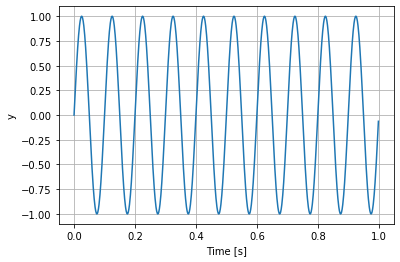

In [3]:
plt.plot(t, y)
plt.ylabel("y")
plt.xlabel("Time [s]")
plt.grid()

Como proximo passo vamos calcular a FFT com usando numpy e ver graficamente o resultado:

In [4]:
y_fft = np.fft.fft(y)

Como esperado a FFT de um sinal é de modo geral um número complexo, podemos verificar isso com o comando abaixo:

In [5]:
y_fft.dtype

dtype('complex128')

Portanto é comum ao analisar o espectro do sinal olhar somente para o módulo dos termos da FFT ou o módulo normalizado pela energia do sinal. Plotando o modulo dos valores obtidos temos:

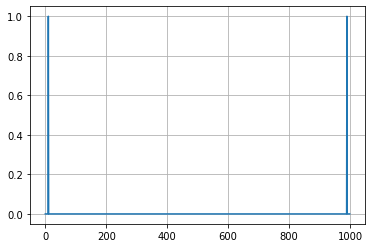

In [6]:
plt.plot(np.abs(y_fft)/np.linalg.norm(y)**2)
plt.grid()

Vemos que ao simplesmente visualizar os valores obtidos no gráfico vemos algo que nos lembra o espéctro de uma senoide com dois picos, um em cada lado do espectro. Notamos também que a função FFT não nos informa sobre os valores de frequência no eixo x. Podemos recuperar os esses valores de diferentes maneiras, vamos a seguir ver alguma delas.

### Usando a função do numpy fftfreq

In [7]:
freqfft = np.fft.fftfreq(len(y_fft))

A função fftfreq nos retorna valores na faixa -0.5 ate 0.5, usando para isso somente tamanho da FFT, isso faz com que essa função seja genérica e independente da frequência de amostragem usada.

In [8]:
np.min(freqfft), np.max(freqfft)

(-0.5, 0.499)

Para de fato recuperar os valores de frequência basta multiplicarmos esses valores pela frequência de amostragem

In [9]:
freqfft *= Fs

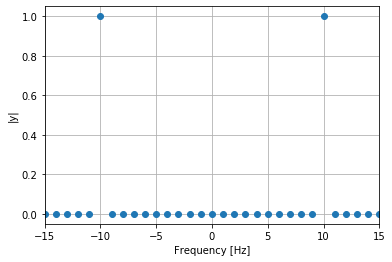

In [10]:
plt.plot(freqfft, np.abs(y_fft)/np.linalg.norm(y)**2, 'o')
plt.ylabel('|y|')
plt.xlabel('Frequency [Hz]')
plt.xlim([-15, 15])
plt.grid()

Agora nosso espectro já esta como esperávamos com dois picos nas frequências -10 e 10 Hz.

### Calculando a frequência usando a função arange

A frequências do espectro da FFT são calculadas amostrando o intervalo de -0.5 até 0.5 com a taxa de amostragem e depois multiplicando pela frequência de amostragem. Porém é preciso ter o cuidado especial com os limites desse intervalo. Primeiro lembremos a função np.fft.fft retorna uma fft com o mesmo tamanho do sinal y, caso esse sinal tenha um tamanho par precisamos usar o intervalo [-0.5, 0.5) (final aberto) e caso tenha um tamanho ímpar deve usar o intervalo [-0.5, 0.5]. 

No caso anterior a função fft.fftfreq já toma esse cuidado para nós. Assim o intervalo amostrado depende do tamanho do sinal e é dado por:

In [11]:
if (len(y) % 2 == 0):
  freq = np.arange(-0.5, 0.5, Ts)*Fs
else:
  freq = np.arange(-0.5, 0.5+Ts, Ts)*Fs

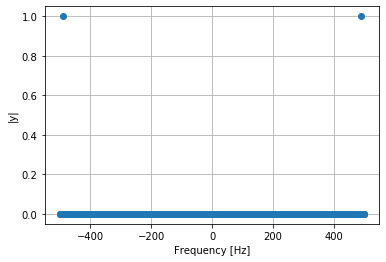

In [12]:
plt.plot(freq, np.abs(y_fft)/np.linalg.norm(y)**2, 'o')
plt.ylabel('|y|')
plt.xlabel('Frequency [Hz]')
plt.grid()

Vemos aqui que apesar a faixa de frequência estar dentro da esperada (-500 a 499) o espectro do sinal não esta correto. Isso acontece pois a função FFT nos retorna o espectro espelhado em relação ao valor central (frequência 0), no exemplo anterior quando usamos a função np.fft.fftfreq as frequências retornadas consideram esse espelhamento sendo a primeira posição do vetor de frequência 0 Hz indo até a frequência mais alta, em seguinda temos a mais negativa até novamente a frequência 0. Podemos ver isso fazendo um plot das frequências calculadas manualmente e com a função np.fft.fftfreq.

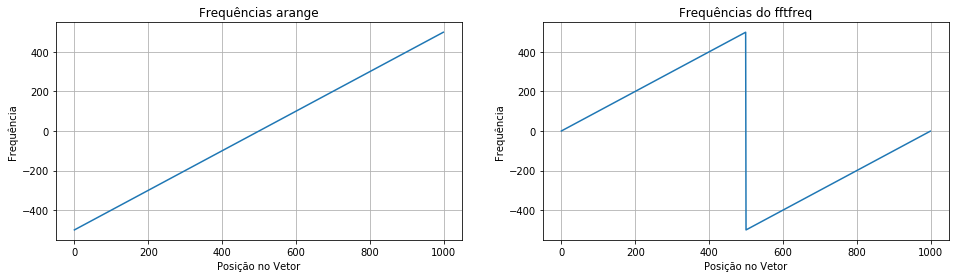

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs[0].plot(freq)
axs[0].set_ylabel("Frequência")
axs[0].set_xlabel("Posição no Vetor")
axs[0].set_title("Frequências arange")
axs[0].grid()
axs[1].plot(freqfft)
axs[1].set_ylabel("Frequência")
axs[1].set_xlabel("Posição no Vetor")
axs[1].set_title("Frequências do fftfreq")
axs[1].grid()

### Corrigindo o espelhamento da FFT

Portanto para obter corretamente o espectro do sinal a partir do vetor de frequência obtido com a função np.arange, precisamos aplicar o espelhamente em relação ao centro ao nosso vetor de frequência ou desfazer esse espelhamento no vetor com os valores da FFT. Felizmente essa correção pode ser feita através da função np.fft.fftshift. A seguir temos os gráficos aplicando as duas correções mencionadas.

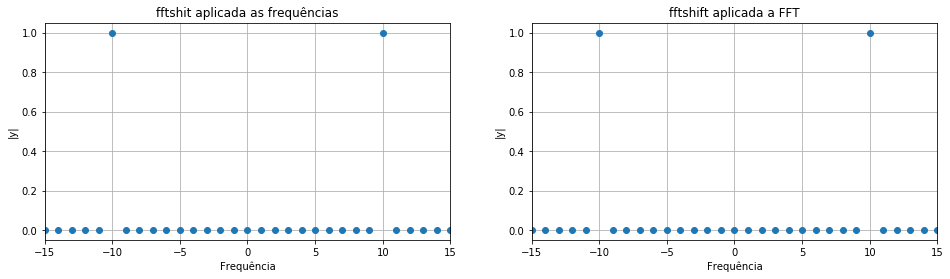

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16,4))
axs[0].plot(np.fft.fftshift(freq), np.abs(y_fft)/np.linalg.norm(y)**2, 'o')
axs[0].set_ylabel("|y|")
axs[0].set_xlabel("Frequência")
axs[0].set_title("fftshit aplicada as frequências")
axs[0].set_xlim([-15, 15])
axs[0].grid()
axs[1].plot(freq, np.abs(np.fft.fftshift(y_fft))/np.linalg.norm(y)**2, 'o')
axs[1].set_ylabel("|y|")
axs[1].set_xlabel("Frequência")
axs[1].set_title("fftshift aplicada a FFT")
axs[1].set_xlim([-15, 15])
axs[1].grid()

### Conclusão

Neste tópico discutimos:
- Como calcular a FFT usando numpy 
- Esclarecemos alguns detalhes sobre como os valores da FFT são obtidos e quais ajustes precisam ser feiros para corretamente obter o espectro do sinal
- Como recuperar a faixa de frequência correspondente ao gráfico da fft
- Com corrigir o espelhamento dos valores retornados pela função np.fft.fft
- Discutimos o uso das funções auxiliares np.fft.fftfreq, np.fft.fftshit.